In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import os

batch_size = 36 # split 0.8 : 9600 / 2400

In [22]:
from google.colab import drive

drive.mount('/content/gdrive')

!ls '/content/gdrive/MyDrive'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 1541455032162-9pzxae9.png
'Colab Notebooks'
'Compte rendu NGS.gdoc'
'CR TP RNAseq.gdoc'
'Document sans titre (1).gdoc'
'Document sans titre.gdoc'
 env.RData
 M1-MEMOIRE-AlizadehNoiret_Gregoire_2021-2022.gdoc
 M1-PRESENTATION-AlizadehNoiret_Gregoire_2021-2022.pdf.gslides
 M1-PRESENTATION-AlizadehNoiret_Gregoire_2021-2022.pdf.pdf
 p500hp32.zip
 p500ht32.zip
 p500t32.zip
 poly_1000_het_png_32.zip
 poly_1000_hom_png_32.zip
 poly_real_data_size_het_png_60.zip
 poly_real_data_size.zip
 prediction_results
'présentation Sanofi - Graphique à secteurs 1.gsheet'
 projet_dl
 projet_s2


In [6]:
# Téléchargement et unzip des images
#!wget -O mnist.tar.gz https://amubox.univ-amu.fr/s/4fAXXBgG4Z2ZnMW/download -nv
#!tar -xzf mnist.tar.gz
#!rm -f mnist.tar.gz

#!unzip '/content/gdrive/MyDrive/projet_dl/poly_1000_hom_png_60.zip'
#!unzip '/content/gdrive/MyDrive/projet_dl/poly_1000_het_png_60.zip'
#!unzip '/content/gdrive/MyDrive/projet_dl/data_aug_new.zip'
#!unzip '/content/gdrive/MyDrive/projet_dl/sim_het.zip'

#!unzip '/content/gdrive/MyDrive/projet_dl/vignettes_v0_triees.zip'
#!unzip '/content/gdrive/MyDrive/projet_dl/vignettes_v1_triees.zip'
#!unzip '/content/gdrive/MyDrive/projet_dl/aug_total.zip'

!unzip '/content/gdrive/MyDrive/projet_dl/sim_benchmark.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: ho3000/6/16323.png      
 extracting: ho3000/6/16324.png      
 extracting: ho3000/6/16325.png      
 extracting: ho3000/6/16326.png      
 extracting: ho3000/6/16327.png      
 extracting: ho3000/6/16328.png      
 extracting: ho3000/6/16329.png      
 extracting: ho3000/6/16330.png      
 extracting: ho3000/6/16331.png      
 extracting: ho3000/6/16332.png      
 extracting: ho3000/6/16333.png      
 extracting: ho3000/6/16334.png      
 extracting: ho3000/6/16335.png      
 extracting: ho3000/6/16336.png      
 extracting: ho3000/6/16337.png      
 extracting: ho3000/6/16338.png      
 extracting: ho3000/6/16339.png      
 extracting: ho3000/6/16340.png      
 extracting: ho3000/6/16341.png      
 extracting: ho3000/6/16342.png      
 extracting: ho3000/6/16343.png      
 extracting: ho3000/6/16344.png      
 extracting: ho3000/6/16345.png      
 extracting: ho3000/6/16346.png      
 extractin

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [136]:
train_img_gen = datagen.flow_from_directory(
    #"./poly_1000_hom_png_60/training/",
    #"./poly_1000_het_png_60/training/",
    #"./data_annot/",
    #"./data_aug_new/aug_training/",
    #"./data_aug_total/",
    #"./aug_total/",
    #"./sim_1/",
    #"./vignettes_v0_triees/",
    #"./vignettes_v1_triees/",
    "./ho300/",
    target_size = (32,32),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    subset      = "training"
)

Found 1440 images belonging to 10 classes.


In [137]:
valid_img_gen = datagen.flow_from_directory(
    #"./poly_1000_hom_png_60/training/",
    #"./poly_1000_het_png_60/training/",
    #"./data_annot/",
    #"./data_aug_new/aug_training/",
    #"./data_aug_total/",
    #"./aug_total/",
    #"./sim_1/",
    #"./vignettes_v0_triees/",
    #"./vignettes_v1_triees/",
    "./ho300/",
    target_size = (32,32),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    subset      = "validation"
)

Found 360 images belonging to 10 classes.


In [138]:
X,y = next(train_img_gen)
X.shape
y.shape
#print(y)

(36, 10)

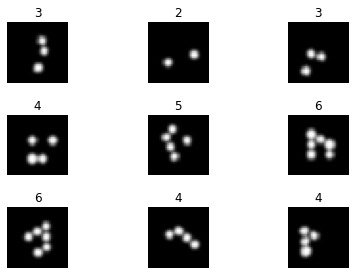

In [139]:
import matplotlib.pyplot as plt
import numpy as np

X,y = next(train_img_gen)
plt.subplots(nrows = 3,ncols = 3)
plt.tight_layout()

labels = []
for l in train_img_gen.class_indices.keys():
  labels.append(l)

k=1
for i in range(3):
  for j in range(3):
    plt.subplot(3,3,k)
    plt.imshow(np.squeeze(X[k-1]),cmap="gray")
    plt.axis("off")
    plt.title(labels[np.argmax(y[k-1])])
    k=k+1

plt.show()

<center><b><u>Réseau convolutif LeNet5</b></u></center>

![Texte alternatif…](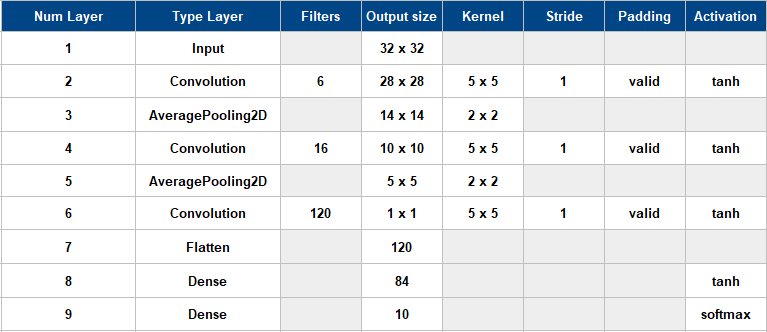
)

In [140]:
from tensorflow.keras.layers import Input,Conv2D,AveragePooling2D,Flatten,Dense
from tensorflow.keras.models import Model

# 1 - Couche d'entrée
inp = Input((32,32,1))

# 2 - Partie convolutive
conv1 = Conv2D( filters = 6, kernel_size = 5, strides = 1, padding="valid", activation="tanh") (inp)
avg1  = AveragePooling2D (pool_size = 2) (conv1)

conv2 = Conv2D( filters = 16, kernel_size = 5, strides = 1, padding = "valid", activation="tanh") (avg1)
avg2  = AveragePooling2D (pool_size = 2) (conv2)

conv3 = Conv2D( filters = 120, kernel_size=5, strides = 1, padding="valid", activation="tanh") (avg2)

flat = Flatten() (conv3)

# 3 - Perceptron multicouche
fc1   = Dense(84, activation="tanh") (flat)

# 4 - Couche de sortie
out   = Dense(10, activation="softmax") (fc1)


model = Model(inputs = inp, outputs = out)

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_15 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 120)         481

In [141]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy

learning_coef = 1e-3

model.compile(Adam(learning_coef),categorical_crossentropy,categorical_accuracy)

H = model.fit(
    train_img_gen,
    validation_data =  (valid_img_gen),
    steps_per_epoch =  train_img_gen.samples // batch_size,
    validation_steps=  valid_img_gen.samples // batch_size,
    epochs=30
)

Epoch 1/30
40/40 [==============================] - 1s 22ms/step - loss: 1.6730 - categorical_accuracy: 0.3187 - val_loss: 1.0607 - val_categorical_accuracy: 0.5944
Epoch 2/30
40/40 [==============================] - 1s 18ms/step - loss: 0.6842 - categorical_accuracy: 0.7715 - val_loss: 0.4395 - val_categorical_accuracy: 0.9250
Epoch 3/30
40/40 [==============================] - 1s 16ms/step - loss: 0.3758 - categorical_accuracy: 0.8840 - val_loss: 0.3563 - val_categorical_accuracy: 0.8500
Epoch 4/30
40/40 [==============================] - 1s 17ms/step - loss: 0.2873 - categorical_accuracy: 0.9042 - val_loss: 0.2721 - val_categorical_accuracy: 0.9083
Epoch 5/30
40/40 [==============================] - 1s 17ms/step - loss: 0.2258 - categorical_accuracy: 0.9278 - val_loss: 0.2175 - val_categorical_accuracy: 0.9333
Epoch 6/30
40/40 [==============================] - 1s 17ms/step - loss: 0.2177 - categorical_accuracy: 0.9181 - val_loss: 0.2460 - val_categorical_accuracy: 0.9222
Epoch 7/30

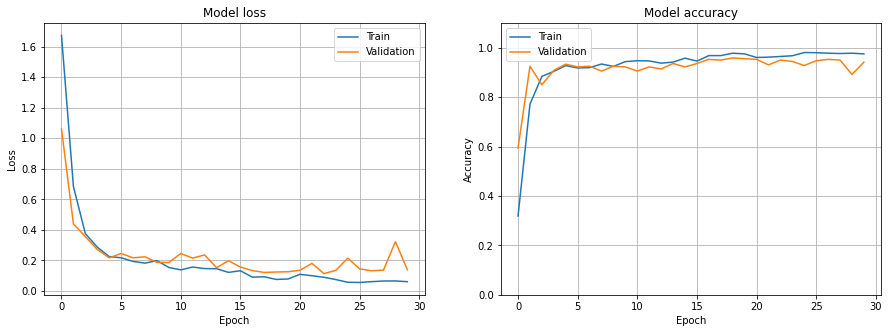

In [142]:
def learning_curves(H):
  # Plot training & validation loss values
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(H.history['loss'])
  ax.plot(H.history['val_loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train', 'Validation'])
  ax.grid(True)

  # Plot training & validation accuracy values
  ax2.plot(H.history['categorical_accuracy'])
  ax2.plot(H.history['val_categorical_accuracy'])
  ax2.set_title('Model accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylim((0,1.1))
  ax2.legend(['Train', 'Validation'])
  ax2.grid(True)

learning_curves(H)

In [143]:
test_img_gen = datagen.flow_from_directory(
    #"./poly_1000_hom_png_60/testing/",
    #"./poly_1000_het_png_60/testing/",
    #"./data_annot/",
    #"./data_aug_new/aug_testing/",
    #"./data_aug_new/aug_testing/",
    #"./aug_total/",
    #"./sim_1/",
    #"./vignettes_v0_triees/",
    #"./vignettes_v1_triees/",
    "./ho1000/",
    target_size = (32,32),
    shuffle=False,
    batch_size=batch_size,
    color_mode  = "grayscale",
)

Found 6000 images belonging to 10 classes.


In [144]:
LOSS,ACC = model.evaluate(test_img_gen)

print("Loss on Test set: ", LOSS)
print("Accuracy on Test set", ACC)

167/167 [==============================] - 2s 13ms/step - loss: 0.1127 - categorical_accuracy: 0.9643
Loss on Test set:  0.11269962787628174
Accuracy on Test set 0.9643333554267883


In [145]:
real_ys, pred_ys = [], []

mon_bool = True
# Pour chaque lot d'images
for k in range(test_img_gen.samples // batch_size):
  mon_bool = False

  X0,y0 = next(test_img_gen)
  #print(y0)
  y_pred = model.predict(X0)
  for i in range(len(y_pred)):
    y = list(y_pred[i]) # y : probabilités d'appartenance à chaque classe
    pred_class = y.index(max(y)) # on définit la prédiction comme la classe la plus probable
    pred_ys.append(pred_class)
    real_ys.append(list(y0[i]).index(max(list(y0[i]))))

real_vs_pred = zip(real_ys, pred_ys)
real_vs_pred = sorted(real_vs_pred, key=lambda x:x[0])
print(real_vs_pred[:3])
d_real_vs_pred = {}
for real_class, pred_class in real_vs_pred:
  #print(real_class, pred_class)
  try:
    d_real_vs_pred[str(real_class)].append(pred_class)
  except:
    d_real_vs_pred[str(real_class)] = [pred_class]

2/2 [==============================] - 0s 9ms/step
[(1, 1), (1, 1), (1, 1)]


In [146]:
print(len(real_ys), len(pred_ys))
#print(len(d_real_vs_pred))
for key in d_real_vs_pred:
  print(key, d_real_vs_pred[key][:6])

5976 5976
1 [1, 1, 1, 1, 1, 1]
2 [2, 2, 2, 2, 2, 2]
3 [3, 3, 3, 3, 3, 3]
4 [4, 4, 4, 4, 4, 4]
5 [5, 5, 5, 5, 5, 5]
6 [6, 6, 6, 6, 6, 6]


In [147]:
real_vs_pred = np.column_stack((real_ys, pred_ys))

In [148]:
print(sqrt(mean_squared_error(real_ys, pred_ys)))

0.1892350556631461


In [149]:
def prop_correct(mylist, ref):
  sum = 0
  for element in mylist:
    if element == ref:
      sum += 1
  return sum/len(mylist)

def n_equal(mylist, ref):
  sum = 0
  for element in mylist:
    try:
      if element == ref:
        sum += 1
    except:
      pass
  return sum

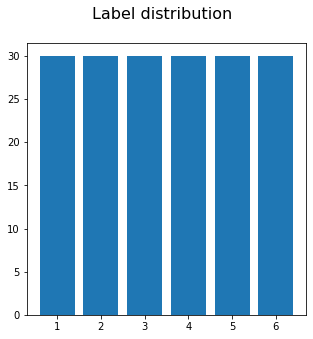

In [150]:
def get_sizes(image_dir, labels_list):
  sizes = {}
  for image_label in labels_list:
    sizes[image_label] = len(os.listdir(str(image_dir)+'/'+str(image_label)))
  return sizes

sizes = get_sizes('ho30', [str(i) for i in range(10)])
n_images = sum([sizes[key] for key in sizes])

fig, ax = plt.subplots(figsize=(5,5), nrows=1, ncols=1)
fig.suptitle('Label distribution', fontsize=16)
for i in range(1, 7):
  ax.bar(i, sizes[str(i)], color='tab:blue')

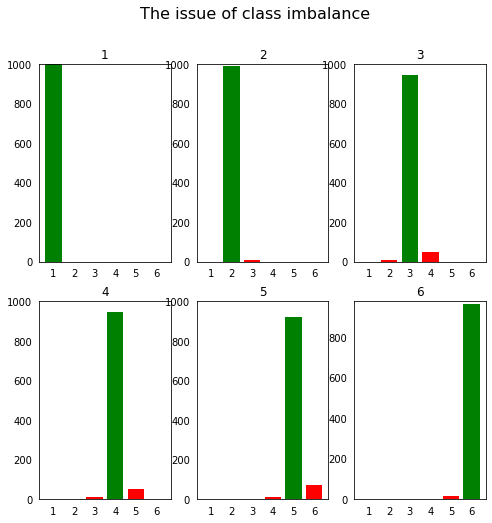

In [151]:
fig, ax = plt.subplots(figsize=(8,8), nrows=2, ncols=3)
fig.suptitle('The issue of class imbalance', fontsize=16)
for i in range(1, 7):
  current_ax = ax[(i-1)//3][(i-1)%3]
  #current_ax.tick_params(left = False, right = False, labelleft = ((i-1)%3 == 0), labelbottom = True, bottom = False)
  current_ax.tick_params(left = False, right = False, labelleft = True, labelbottom = True, bottom = False)
  for j in range(1, 7):
    col = ['g' if i == j else 'r']
    if str(i) in d_real_vs_pred:
      current_ax.bar(j, n_equal(d_real_vs_pred[str(i)], j), color=col)
    else:
      current_ax.bar(j, 0, color=col)
  current_ax.set_title(f'{str(i)}')
  current_ax.set_xticks([k for k in range(1, 7)])
  if str(i) in d_real_vs_pred:
    current_ax.set_ylim((0,len(d_real_vs_pred[str(i)])))
  else:
    current_ax.set_ylim((0,0))

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(real_ys, pred_ys)

array([[3000,    0,    0,    0,    0,    0],
       [   0, 2988,   12,    0,    0,    0],
       [   0,    0, 2974,   26,    0,    0],
       [   0,    0,    2, 2979,   19,    0],
       [   0,    0,    0,    2, 2981,   17],
       [   0,    0,    0,    0,   65, 2935]])

In [152]:
X0,y0 = next(test_img_gen)
y_pred = model.predict(X0)

1/1 [==============================] - 0s 18ms/step


In [153]:
import pickle

#pickle.dump(model, open('/content/gdrive/MyDrive/projet_dl/model_save.pickle', 'wb'))
#model_load = pickle.load(open('/content/gdrive/MyDrive/projet_dl/model_save.pickle', 'rb'))

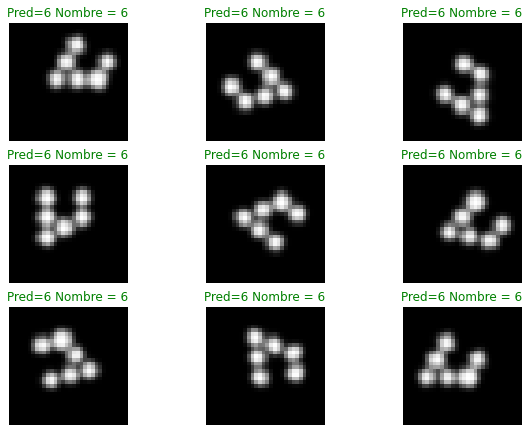

In [154]:
import random

def visualisation_predictions(X0,y0,y_pred):
  images = []
  images = random.sample(list(range(X0.shape[0])),9)


  f = plt.figure(figsize=(10,10))
  for i in range(9):
    ax = f.add_subplot(431+i)
    ax.imshow(X0[images[i],0:32,0:32,0],cmap="gray")
    title_obj = ax.set_title("Pred=" +str(np.argmax(y_pred[images[i]]))+" Nombre = "+str(np.argmax(y0[images[i]])))
    plt.axis("off")
    if (np.argmax(y_pred[images[i]])!=np.argmax(y0[images[i]])):
      plt.setp(title_obj, color='r')
    else:
      plt.setp(title_obj, color='g')

visualisation_predictions(X0,y0,y_pred)


In [155]:
import os
try:
  os.mkdir('/content/gdrive/MyDrive/prediction_results')
except:
  pass
for i in range(1,10):
  try:
    os.mkdir('/content/gdrive/MyDrive/prediction_results/'+str(i))
  except:
    pass

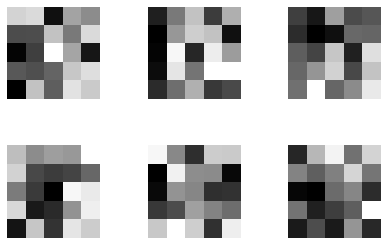

In [156]:
#On récupère les noyaux
noyau = np.squeeze(model.layers[1].get_weights()[0])

#On les affiche
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(noyau[:,:,k-1]),cmap="gray")
    plt.axis("off")
    k=k+1
plt.show()


Après la première couche convolutive


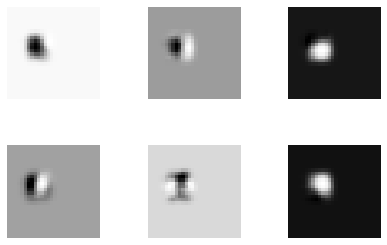

In [157]:
import tensorflow.keras.backend as K
#On crée un modèle ne contenant que les layers 0 et 1
to_layer=1
functor = K.function([model.layers[0].input],[model.layers[to_layer].output])
X,_ = next(test_img_gen)
output = functor([X])[0]

print('Après la première couche convolutive')
#On affiche les images sortant de la première couche convolutive
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(output)[0,:,:,k-1],cmap="Greys")
    plt.axis("off")
    k=k+1
plt.show()


Après le premier layer de convolution (C1)


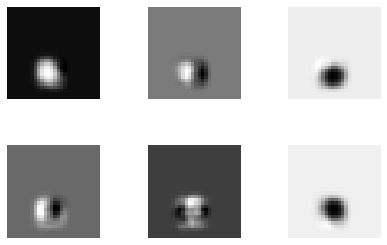

Après le premier layer de Pooling (S1)


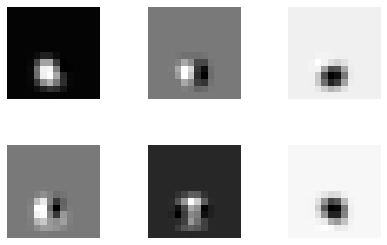

Après la seconde couche convolutive (C3)


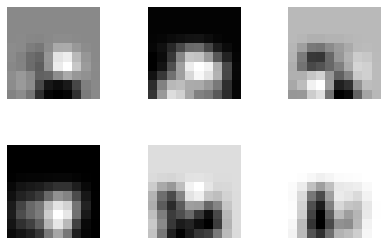

Après la seconde couche de Pooling (S4)


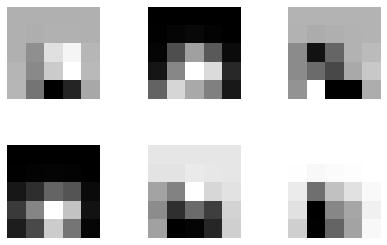

In [158]:
#@title Executez cette cellule !
to_layer=1
functor = K.function([model.layers[0].input],[model.layers[to_layer].output])
X,_ = next(test_img_gen)
output = functor([X])[0]

print('Après le premier layer de convolution (C1)')
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(output)[0,:,:,k-1],cmap="gray")
    plt.axis("off")
    k=k+1
plt.show()

to_layer=2
functor = K.function([model.layers[0].input],[model.layers[to_layer].output])
output = functor([X])[0]

print('Après le premier layer de Pooling (S1)')
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(output)[0,:,:,k-1],cmap="gray")
    plt.axis("off")
    k=k+1
plt.show()

to_layer=3
functor = K.function([model.layers[0].input],[model.layers[to_layer].output])
output = functor([X])[0]

print('Après la seconde couche convolutive (C3)')
#On affiche les images sortant de la première couche convolutive
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(output)[0,:,:,k-1],cmap="gray")
    plt.axis("off")
    k=k+1
plt.show()

to_layer=4
functor = K.function([model.layers[0].input],[model.layers[to_layer].output])
output = functor([X])[0]

print('Après la seconde couche de Pooling (S4)')
#On affiche les images sortant de la première couche convolutive
plt.subplots(nrows = 2,ncols = 3)
plt.tight_layout()
k=1
for i in range(2):
  for j in range(3):
    plt.subplot(2,3,k)
    plt.imshow(np.squeeze(output)[0,:,:,k-1],cmap="gray")
    plt.axis("off")
    k=k+1
plt.show()